In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crop_yield.csv to crop_yield.csv


In [ ]:
import os
print(os.listdir())



['.config', 'crop_yield.csv', 'archive.zip', 'sample_data']


In [ ]:
import pandas as pd
df = pd.read_csv("crop_yield.csv")
df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
#to download the file
df.to_csv("crop_yield.csv", index=False)


files.download("crop_yield.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving crop_yield (1).csv to crop_yield (1).csv


In [ ]:
import pandas as pd
df = pd.read_csv("crop_yield.csv")
print(df.shape)


(19689, 10)


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving crop_yield.csv to crop_yield.csv


In [ ]:
import pandas as pd
df = pd.read_csv("crop_yield.csv")
print(df.shape)

(19689, 10)


(19689, 10)
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
Preprocessing done, saved as Cleaned_Crop_Yield.csv


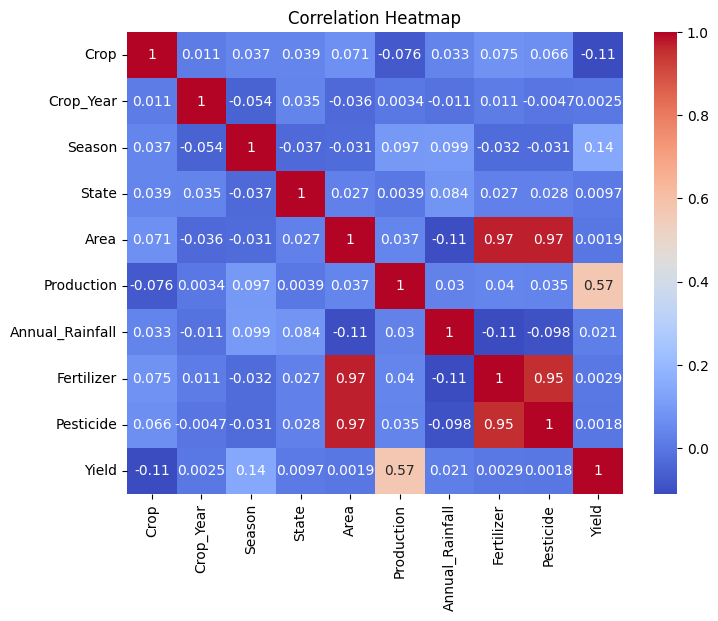

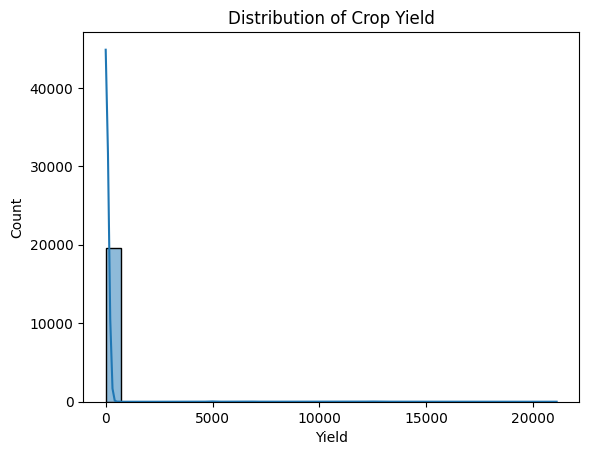

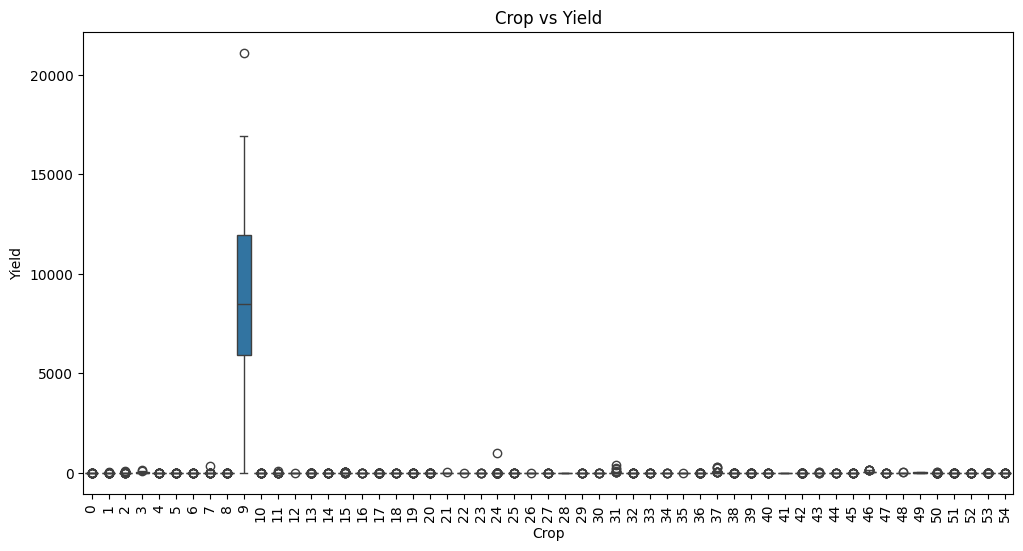

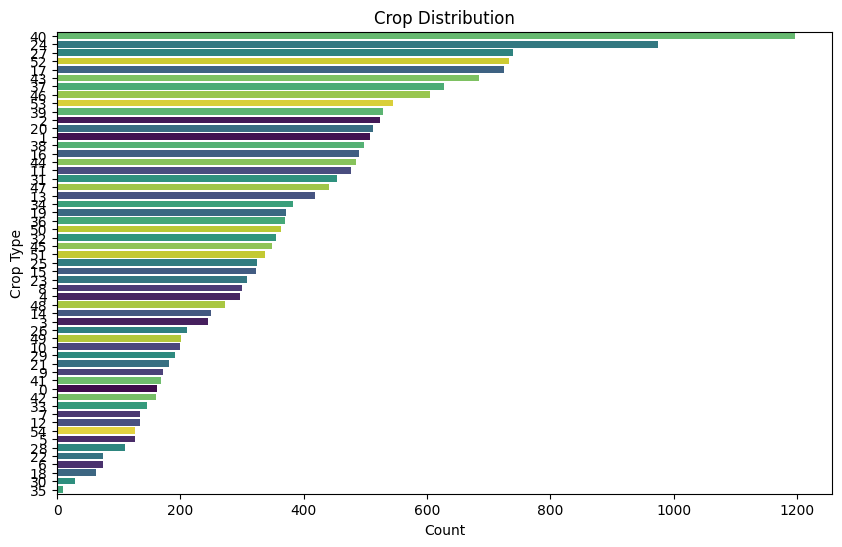

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load dataset
df = pd.read_csv("crop_yield.csv")

print(df.shape)
print(df.isnull().sum())   # check missing values

# Handle missing values & duplicates
df = df.drop_duplicates()
df = df.dropna()

# Normalize numerical features.Normalizes (scales) all numeric values between 0 and 1 so they’re easier for the model to compare.
scaler = MinMaxScaler()
num_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode categorical features
le = LabelEncoder()
cat_cols = ['Crop', 'Season', 'State']
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#Save cleaned dataset
df.to_csv("Cleaned_Crop_Yield.csv", index=False)
print("Preprocessing done, saved as Cleaned_Crop_Yield.csv")
#EDA
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Distribution of target (Yield)
sns.histplot(df['Yield'], kde=True, bins=30)
plt.title("Distribution of Crop Yield")
plt.show()

# Crop vs Yield (after encoding, higher number = different crop)
plt.figure(figsize=(12,6))
sns.boxplot(x='Crop', y='Yield', data=df)
plt.title("Crop vs Yield")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(y='Crop', data=df, order=df['Crop'].value_counts().index, hue='Crop', palette='viridis', legend=False)
plt.title("Crop Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

(19689, 10)
Crop               0
Crop_Year          0
Season             0
State              0
Area               0
Production         0
Annual_Rainfall    0
Fertilizer         0
Pesticide          0
Yield              0
dtype: int64
✅ Preprocessing done — saved as Cleaned_Crop_Yield.csv

Mapping for Crop:
Arecanut → 0
Arhar/Tur → 1
Bajra → 2
Banana → 3
Barley → 4
Black pepper → 5
Cardamom → 6
Cashewnut → 7
Castor seed → 8
Coconut  → 9
Coriander → 10
Cotton(lint) → 11
Cowpea(Lobia) → 12
Dry chillies → 13
Garlic → 14
Ginger → 15
Gram → 16
Groundnut → 17
Guar seed → 18
Horse-gram → 19
Jowar → 20
Jute → 21
Khesari → 22
Linseed → 23
Maize → 24
Masoor → 25
Mesta → 26
Moong(Green Gram) → 27
Moth → 28
Niger seed → 29
Oilseeds total → 30
Onion → 31
Other  Rabi pulses → 32
Other Cereals → 33
Other Kharif pulses → 34
Other Summer Pulses → 35
Peas & beans (Pulses) → 36
Potato → 37
Ragi → 38
Rapeseed &Mustard → 39
Rice → 40
Safflower → 41
Sannhamp → 42
Sesamum → 43
Small millets → 44
Soyabean → 4

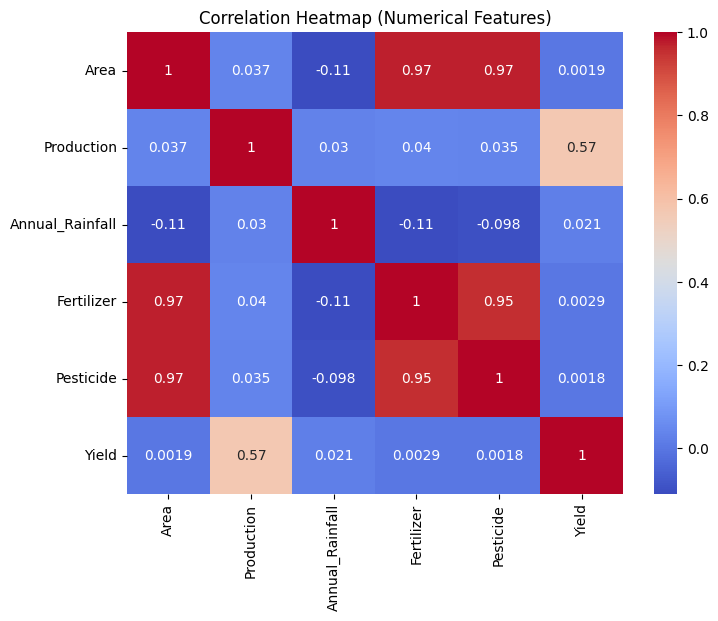

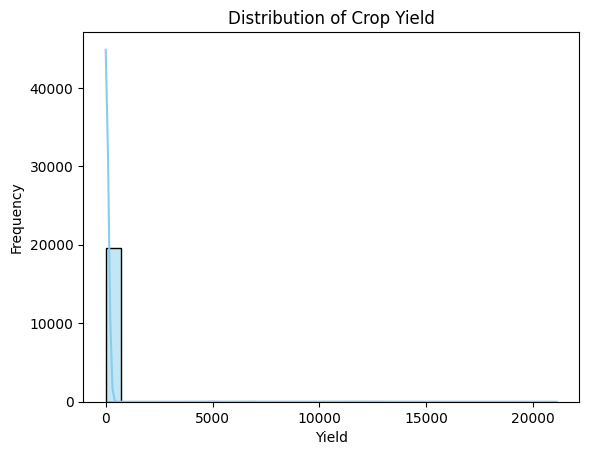

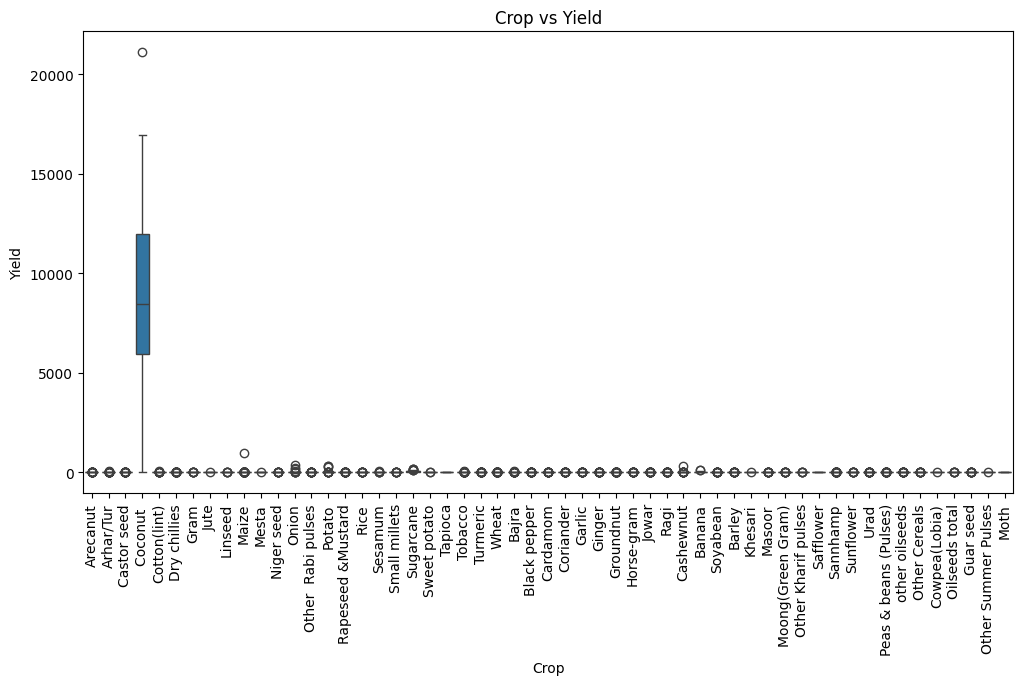

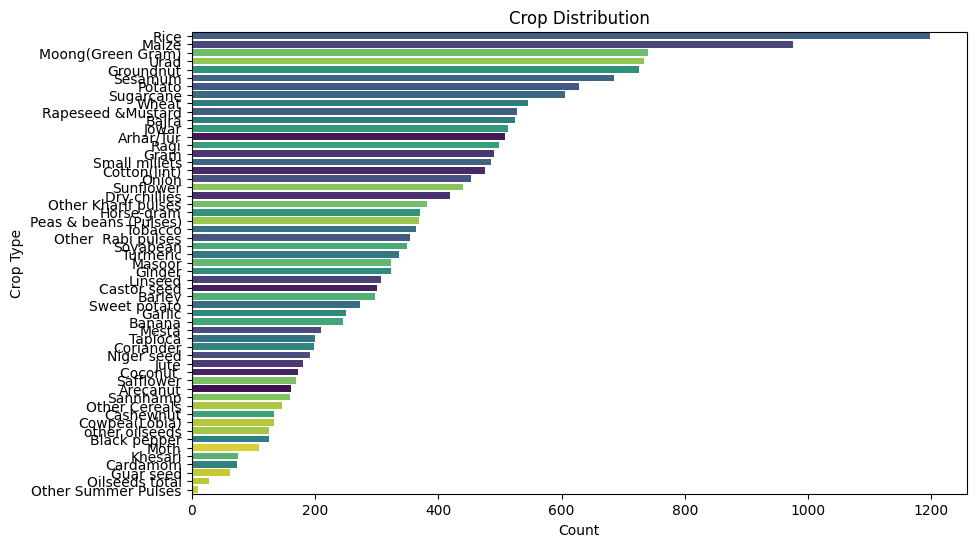

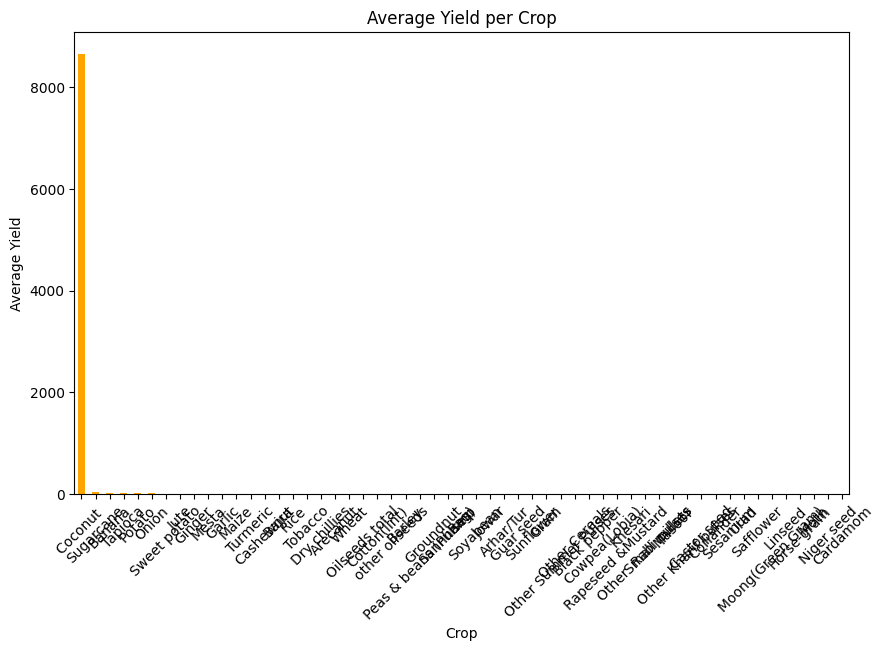

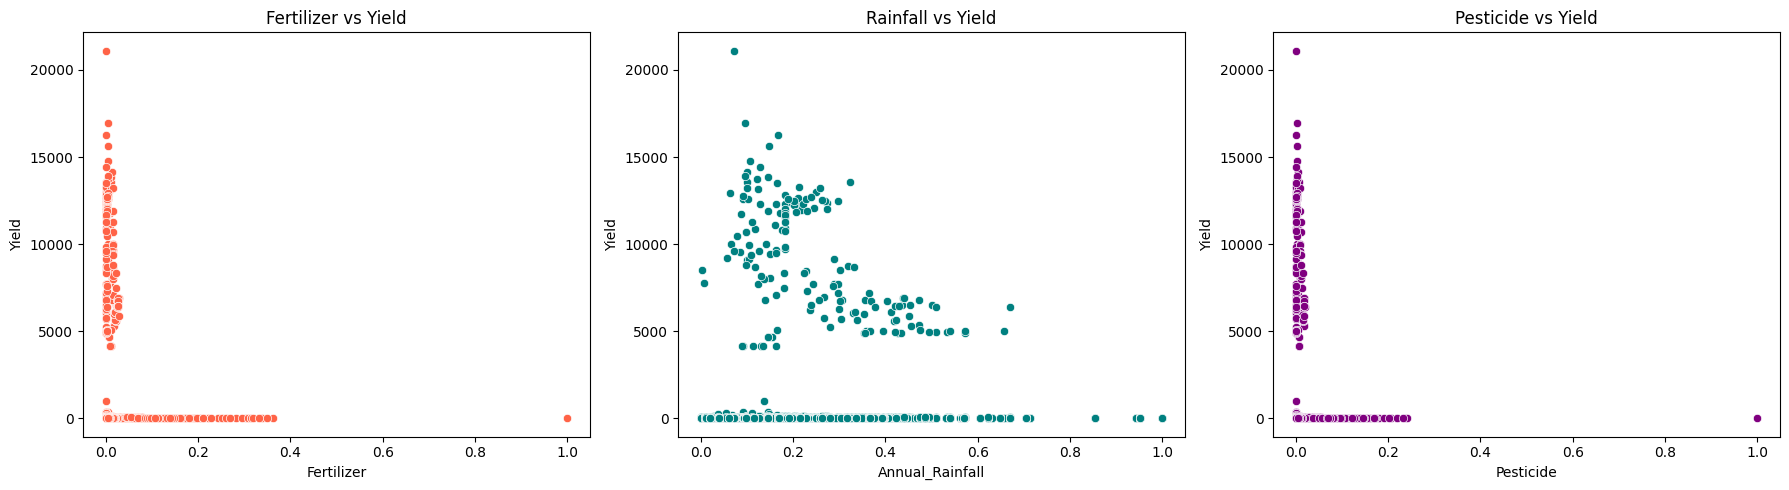

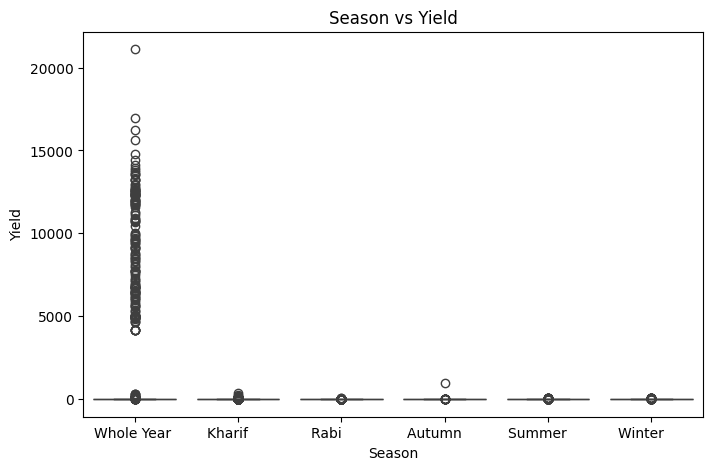

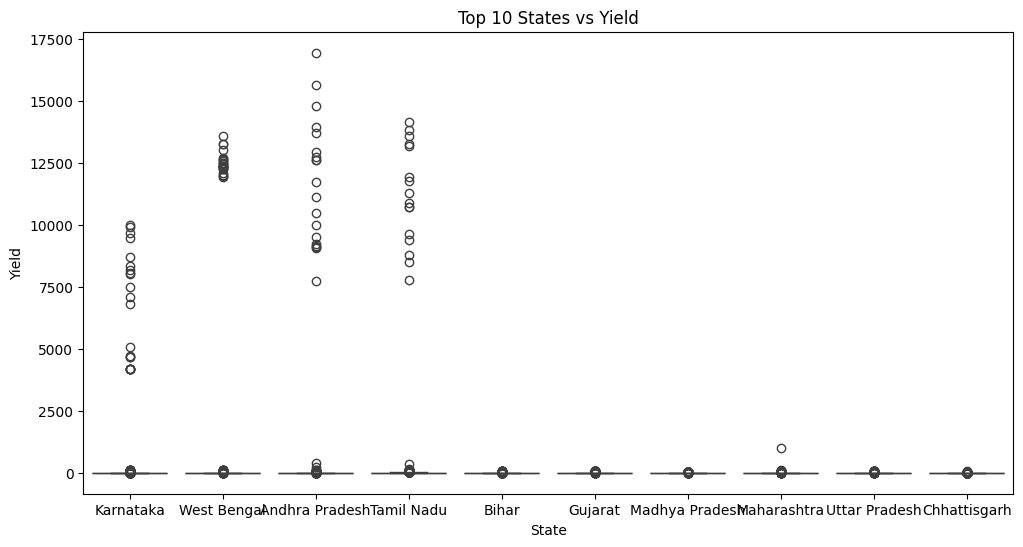

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder


df = pd.read_csv("crop_yield.csv")

print(df.shape)
print(df.isnull().sum())   # check missing values


df = df.drop_duplicates()
df = df.dropna()


scaler = MinMaxScaler()
num_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide']
df[num_cols] = scaler.fit_transform(df[num_cols])


encoders = {}
cat_cols = ['Crop', 'Season', 'State']

# Make a copy for visualization before encoding
df_viz = df.copy()

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le


df.to_csv("Cleaned_Crop_Yield.csv", index=False)
print("✅ Preprocessing done — saved as Cleaned_Crop_Yield.csv")


for col in cat_cols:
    print(f"\nMapping for {col}:")
    for i, label in enumerate(encoders[col].classes_):
        print(f"{label} → {i}")



# Correlation heatmap (numerical only)
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + ['Yield']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

# Distribution of Yield
sns.histplot(df_viz['Yield'], kde=True, bins=30, color='skyblue')
plt.title("Distribution of Crop Yield")
plt.xlabel("Yield")
plt.ylabel("Frequency")
plt.show()

# Crop vs Yield (use original names)
plt.figure(figsize=(12,6))
sns.boxplot(x='Crop', y='Yield', data=df_viz)
plt.title("Crop vs Yield")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(y='Crop', data=df_viz, order=df_viz['Crop'].value_counts().index, hue='Crop', legend=False, palette='viridis')
plt.title("Crop Distribution")
plt.xlabel("Count")
plt.ylabel("Crop Type")
plt.show()

# Average yield per crop
avg_yield = df_viz.groupby('Crop')['Yield'].mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
avg_yield.plot(kind='bar', color='orange')
plt.title("Average Yield per Crop")
plt.ylabel("Average Yield")
plt.xlabel("Crop")
plt.xticks(rotation=45)
plt.show()

# Relationship of Fertilizer, Rainfall, and Pesticide with Yield
fig, axes = plt.subplots(1, 3, figsize=(18,5))
sns.scatterplot(x='Fertilizer', y='Yield', data=df_viz, ax=axes[0], color='tomato')
sns.scatterplot(x='Annual_Rainfall', y='Yield', data=df_viz, ax=axes[1], color='teal')
sns.scatterplot(x='Pesticide', y='Yield', data=df_viz, ax=axes[2], color='purple')
axes[0].set_title("Fertilizer vs Yield")
axes[1].set_title("Rainfall vs Yield")
axes[2].set_title("Pesticide vs Yield")
plt.tight_layout()
plt.show()

# Season vs Yield
plt.figure(figsize=(8,5))
sns.boxplot(x='Season', y='Yield', data=df_viz)
plt.title("Season vs Yield")
plt.show()

# State vs Yield (Top 10)
top_states = df_viz['State'].value_counts().head(10).index
plt.figure(figsize=(12,6))
sns.boxplot(x='State', y='Yield', data=df_viz[df_viz['State'].isin(top_states)])
plt.title("Top 10 States vs Yield")
plt.show()
